Yasaman Shahrasbi

COMP 5107 - Assignment2

Libraries

In [1]:
import numpy as np
from numpy import linalg as LA

# Inputs

## Mean

In [ ]:
# Class 1 Mean
mean1 = np.array([4, 1, 3])

# Class 2 Mean
mean2 = np.array([-4, 1, -3])

## Covariance

In [ ]:
# Covariance Parameters
a = 4
b = 3
c = 2
alpha = 0.1
beta = 0.2

In [ ]:
# Covariance matrix 1
sigma1 = np.array([[a**2, alpha * a * b, beta * a * c],
                       [alpha * a * b, b**2, alpha * b * c],
                       [beta * a * c, alpha * b * c, c**2]])

In [ ]:
# Covariance matrix 2
sigma2 = np.array([[c**2, beta * b * c, alpha * a * c],
                       [beta * b * c, b**2, alpha * a * b],
                       [alpha * a * c, alpha * a * b, a**2]])

# Part a

Write a program to generate Gaussian random vectors assuming that you only have access to a 
function which generates Uniform random variables.

In [ ]:
# This function generates Gaussian random vectors. 
# It gets the number of dimensions of the vector as the input.

def generate_gaussian_vector(dimension):
  vector = []
  for d in range(dimension):
    number = 0
    for i in range(0, 12):
      number = number + np.random.uniform(0, 1, size=1)[0]
    number = number - 6
    vector.append(number)
  return np.array(vector)

In [ ]:
generate_gaussian_vector(3)

array([-0.34958877,  1.31971602,  0.40262651])

In [ ]:
# This function generates Gaussian random matrices. 
# It gets the dimension of points, number of points to generate, mean and covariance matrix as input.

def generate_gaussian_matrix(dimension, number_of_points, mean, sigma):
  # The first part of the code generates a gaussian random matrix of points with mean = 0 and covariance matrix = I (identity matrix) 
  random_matrix = np.zeros((dimension, number_of_points))
  for d in range(dimension):
    number = 0
    for i in range(0, 12):
      number = number + np.random.uniform(0, 1, number_of_points)
    number = number - 6
    random_matrix[d,:] = number

  # Now that a random gaussian matrix is generated with mean = 0 and covariance matrix = I (identity matrix), 
  # the goal is to convert the matrix to a normal distribution where mean is equal to mean of X and the convariance matrix is equal to sigma of X

  w, v = LA.eig(sigma) #eigen value and eigen vector of 
  matrix_X = np.dot(np.dot(v, np.power(np.diag(w), 1/2)), random_matrix)
  for col in range(number_of_points):
    matrix_X[:, col] = matrix_X[:, col] + mean
  return matrix_X

# Part c

Generate 200 points of each distribution for the case of a=4, b=3, c=2 and alpha=0.1, beta=0.2. before 
diagonalization and plot them in the (x1– x2) and (x1– x3) domains. These points are 200 3-D 
vectors, but the projected points in the (x1– x2) and (x1– x3) domains must be plotted graphically.


In [ ]:
# Generating 200 points of each distribution

matrix_X1 = generate_gaussian_matrix(3, 200, mean1, sigma1)
matrix_X2 = generate_gaussian_matrix(3, 200, mean2, sigma2)

In [ ]:
# Function to plot the points

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import pyplot

def plot(matrix_of_points1, matrix_of_points2, d1, d2, title):
  figure(figsize=(7, 7), dpi=80)
  plt.scatter(matrix_of_points1[d1-1, :], matrix_of_points1[d2-1, :], color = 'pink', label = "Class1")
  plt.scatter(matrix_of_points2[d1-1, :], matrix_of_points2[d2-1, :], color = 'green', label = "Class2")

  plt.title("x"+str(d1)+"-x"+str(d2)+" "+title) 
  plt.xlabel("x-"+str(d1))
  plt.ylabel("x-"+str(d2))
  plt.legend(fontsize=14)
  plt.show()

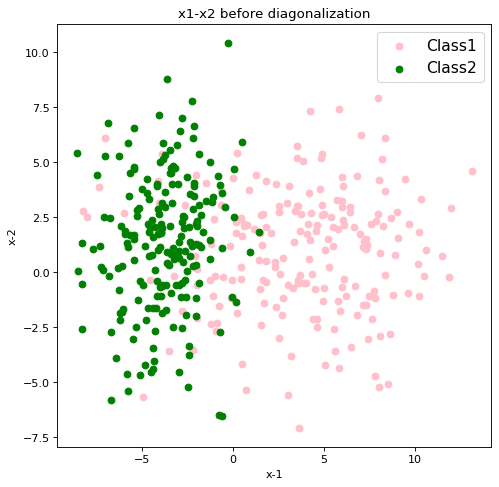

In [ ]:
# plot the points in matrix X1 and matrix X2 along x1-x2 dimension
plot(matrix_X1, matrix_X2, 1, 2, "before diagonalization")

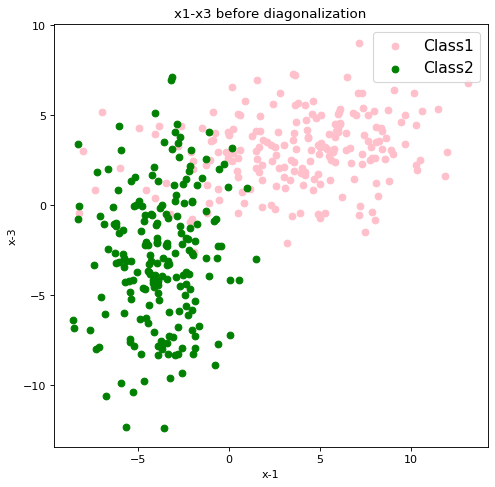

In [ ]:
# plot the points in matrix X1 and matrix X2 along x1-x3 dimension
plot(matrix_X1, matrix_X2, 1, 3, "before diagonalization")

# Part b & d

Part b: 
Using the strategy taught in class, write a program to simultaneously diagonalize both the 
distributions. Print out the diagonalizing matrices for a few cases, and in particular, for the case of
a=4, b=3, c=2 and alpha=0.1, beta=0.2. Show the intermediate covariance matrices in the process.


Part d:
Consider the same 200 generated in (b) above for the case of a=4, b=3, c=2 and alpha=0.1, beta=0.2. after diagonalization and plot them in the (x1– x2) and (x1– x3) domains. Again, remember that these points are 200 3-D vectors, but the points in the (x1– x2) and (x1– x3) domains must be plotted graphically

## Calculate eigen values and eigen vectors of sigma1 and sigma2

In [ ]:
eigen_value_sigma_1, eigen_vector_sigma1 = LA.eig(sigma1)
eigen_value_sigma_2, eigen_vector_sigma2 = LA.eig(sigma2)

## Step1: Diagonalizing the distribution of points in class 1 -> isothetic elipses

In [ ]:
# Y = H * X

matrix_Y1 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X1)
matrix_Y2 = np.dot(np.transpose(eigen_vector_sigma1), matrix_X2)

In [ ]:
# sigma Y = H * sigma X * transpose(H)

sigma_Y1 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma1), eigen_vector_sigma1)
sigma_Y2 = np.dot(np.dot(np.transpose(eigen_vector_sigma1), sigma2), eigen_vector_sigma1)

In [ ]:
# Covariance matrix of Y1 is a Diagonal matrix. Points of the first class follow the shape of isothetic elipses.
# Entries outside the main diagonal are close to zero, and only the entries on the main diagonal have values other than 0. (diagonal matrix)
sigma_Y1

array([[ 1.64265396e+01,  1.39591713e-15,  2.68717809e-15],
       [ 1.46322279e-15,  3.75267774e+00, -1.96113895e-15],
       [ 2.37321401e-15, -2.10546450e-15,  8.82078267e+00]])

In [ ]:
# Covariance matrix of Y2
sigma_Y2

array([[ 5.01575708, -2.33829236, -2.24457262],
       [-2.33829236, 15.40444163,  1.21674444],
       [-2.24457262,  1.21674444,  8.57980129]])

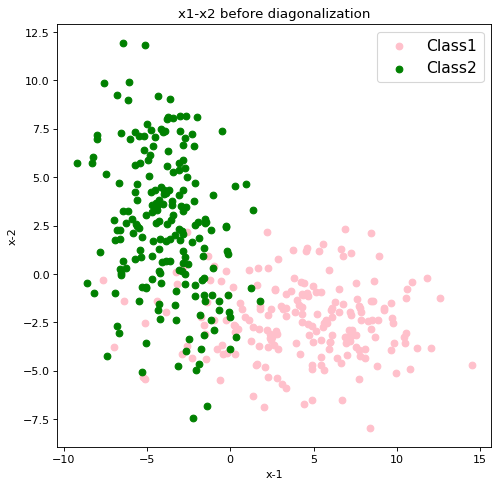

In [ ]:
# plot the points in matrix Y1 and Y2 along x1-x2 dimension
plot(matrix_Y1, matrix_Y2, 1, 2, "before diagonalization")

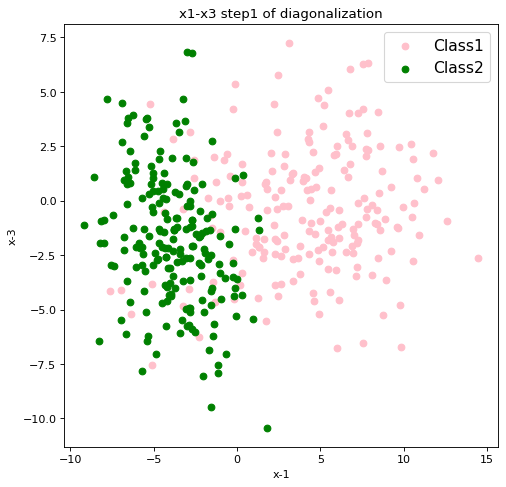

In [ ]:
# plot the points in matrix Y1 and matrix Y2 along x1-x3 dimension
plot(matrix_Y1, matrix_Y2, 1, 3, "step1 of diagonalization")

## Step2: Diagonalizing and whitening the distribution of points in class 1 -> concentric circles

In [ ]:
# Z = H * Y
# Z = power(lambda, -1/2) * Y

matrix_Z1 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y1)
matrix_Z2 = np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), matrix_Y2)

In [ ]:
# sigma Z = H * sigma X * transpose(H)
# sigma Z = power(lambda, -1/2) * sigma Y * power(lambda, -1/2)

sigma_Z1 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y1), np.diag(np.power(eigen_value_sigma_1, -1/2)))
sigma_Z2 = np.dot(np.dot(np.diag(np.power(eigen_value_sigma_1, -1/2)), sigma_Y2), np.diag(np.power(eigen_value_sigma_1, -1/2)))

In [ ]:
# Covariance matrix of Z1 - Diagonalized and whitened matrix
# The covariance matrix of Z1 is equal to the identity matrix.
# The points in class 1 follow the shape of concentric circles.
# All the entries on the main diagonal equals 1, and all the other entries equal zero (very very close to zero). 

sigma_Z1

array([[ 1.00000000e+00,  1.77793533e-16,  2.23238886e-16],
       [ 1.86366041e-16,  1.00000000e+00, -3.40866381e-16],
       [ 1.97156137e-16, -3.65951664e-16,  1.00000000e+00]])

In [ ]:
# Covariance matrix of Z2
sigma_Z2

array([[ 0.30534472, -0.29782087, -0.18646918],
       [-0.29782087,  4.10491993,  0.21148286],
       [-0.18646918,  0.21148286,  0.97268027]])

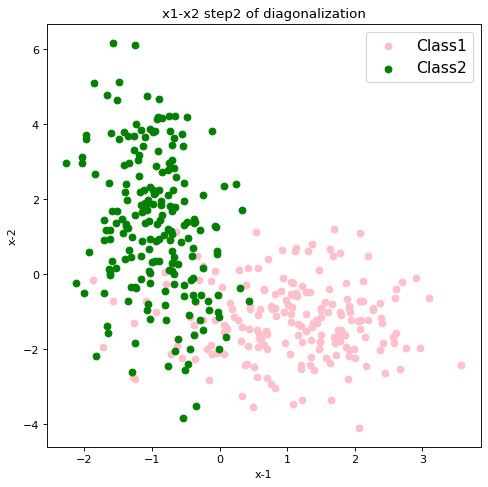

In [ ]:
# plot the points in matrix Z1 and matrix Z2 along x1-x2 dimension

plot(matrix_Z1, matrix_Z2, 1, 2, "step2 of diagonalization")

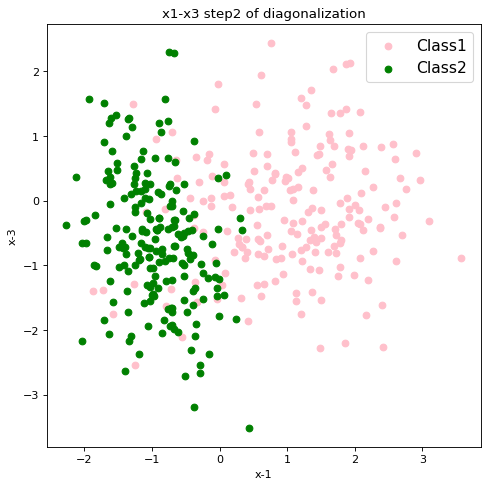

In [ ]:
# plot the points in matrix Z1 and matrix Z2 along x1-x3 dimension

plot(matrix_Z1, matrix_Z2, 1, 3, "step2 of diagonalization")

## Step3: Diagonalizing the distribution of points in class 2 -> isothetic elipses

In [ ]:
eigen_value_sigma_Z1, eigen_vector_sigma_Z1 = LA.eig(sigma_Z1)
eigen_value_sigma_Z2, eigen_vector_sigma_Z2 = LA.eig(sigma_Z2)

In [ ]:
# A = H * Z

matrix_A1 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z1)
matrix_A2 = np.dot(np.transpose(eigen_vector_sigma_Z2), matrix_Z2)

In [ ]:
# sigma A = H * sigma X * transpose(H)

sigma_A1 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z1), eigen_vector_sigma_Z2 )
sigma_A2 = np.dot( np.dot(np.transpose(eigen_vector_sigma_Z2), sigma_Z2), eigen_vector_sigma_Z2 )

In [ ]:
# Covariance matrix of A1 - Diagonalized and whitened matrix
# The covariance matrix still equals to the identity matrix.
# The points in class 1 still follow the shape of concentric circles.

sigma_A1

array([[ 1.00000000e+00,  5.15707036e-16, -3.74484891e-16],
       [ 5.08363762e-16,  1.00000000e+00,  1.84733590e-16],
       [-3.98960860e-16,  1.34929151e-16,  1.00000000e+00]])

In [ ]:
# Covariance matrix of A2 is a diagonal matrix.
# The points in class2 follow the shape of isothetic elipses.
# All the off-main diagonal entries equal to zero.
sigma_A2

array([[ 4.14416888e+00,  1.24450918e-15,  1.88510734e-16],
       [ 1.22311196e-15,  2.42110124e-01, -3.03551773e-17],
       [ 2.44596169e-16, -2.25632472e-17,  9.96665910e-01]])

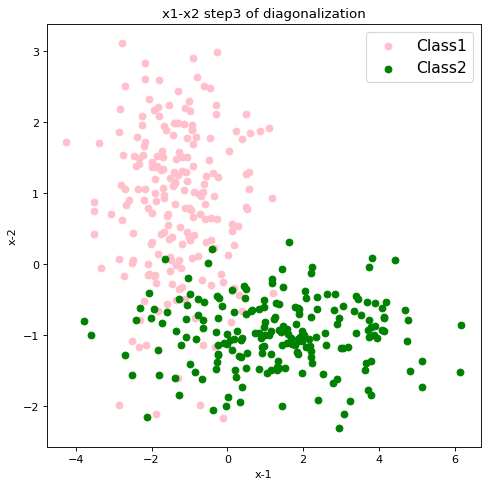

In [ ]:
# plot the points in matrix A1 and matrix A2 along x1-x2 dimension

plot(matrix_A1, matrix_A2, 1, 2, "step3 of diagonalization")

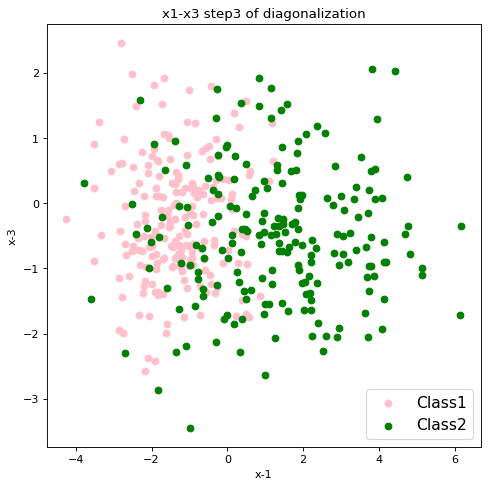

In [ ]:
# plot the points in matrix A1 and matrix A2 along x1-x3 dimension

plot(matrix_A1, matrix_A2, 1, 3, "step3 of diagonalization")